In [143]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [144]:
#read the CSV file
df= pd.read_csv("Auto sales.csv")

In [145]:
# display first few rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,POSTALCODE1,POSTALCODE2,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2,2871.00,24/02/2018,828.0,Shipped,Motorcycles,95.0,...,2125557818,897 Long Airport Avenue,2678 Kingston Rd.,NYC,94019,10022,USA,Yu,Kwai,Small
1,10121,34.0,81.35,5,2765.90,07/05/2018,757.0,Shipped,Motorcycles,95.0,...,26.47.1555,59 rue de l'Abbaye,7476 Moss Rd.,Reims,51247,51100,NaN,Henriot,Paul,Small
2,10134,41.0,94.74,2,3884.34,01/07/2018,703.0,Shipped,Motorcycles,95.0,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,25593 South Bay Ln.,Paris,97823,75508,France,Da Cunha,Daniel,Mediumer
3,10145,45.0,83.26,6,3746.70,25/08/2018,649.0,NaN,Motorcycles,95.0,...,6265557265,78934 Hillside Dr.,7635 Spinnaker Dr.,Pasadena,106-0032,90003,USA,Young,Julie,Mediumer
4,10168,36.0,96.66,1,3479.76,28/10/2018,586.0,Shipped,Motorcycles,95.0,...,6505556809,9408 Furth Circle,39323 Spinnaker Dr.,Burlingame,2067,94217,USA,Hirano,Juri,Medium


In [146]:
#list all columns
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1',
       'ADDRESSLINE2', 'CITY', 'POSTALCODE1', 'POSTALCODE2', 'COUNTRY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [147]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2809 non-null   int64  
 1   QUANTITYORDERED       2799 non-null   float64
 2   PRICEEACH             2808 non-null   float64
 3   ORDERLINENUMBER       2809 non-null   int64  
 4   SALES                 2809 non-null   float64
 5   ORDERDATE             2809 non-null   object 
 6   DAYS_SINCE_LASTORDER  2802 non-null   float64
 7   STATUS                2786 non-null   object 
 8   PRODUCTLINE           2790 non-null   object 
 9   MSRP                  2772 non-null   float64
 10  PRODUCTCODE           2809 non-null   object 
 11  CUSTOMERNAME          2803 non-null   object 
 12  PHONE                 2809 non-null   object 
 13  ADDRESSLINE1          2800 non-null   object 
 14  ADDRESSLINE2          608 non-null    object 
 15  CITY                 

In [148]:
#we have 2809 rows and 22 columns
df.shape

(2809, 22)

In [149]:
print(df.describe())

       ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2809.00000      2799.000000  2808.000000      2809.000000   
mean   10259.41367        35.128617   102.074491         6.467782   
std       91.88353         9.752104    42.911131         4.222672   
min    10100.00000         6.000000    26.880000         1.000000   
25%    10181.00000        27.000000    69.280000         3.000000   
50%    10263.00000        35.000000    96.295000         6.000000   
75%    10334.00000        43.000000   128.392500         9.000000   
max    10425.00000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2809.000000           2802.000000  2772.000000  
mean    3587.928348           1729.453248   101.588745  
std     1867.638521            834.008152    41.026908  
min      482.130000             42.000000    33.000000  
25%     2218.520000           1027.000000    68.750000  
50%     3206.320000           1733.5

### Duplicates

In [150]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

#There are no duplicates

0


###Dealing with Missing values

In [151]:
#Finding the missing values. Let's see how many missings we have
df.isnull().sum()

ORDERNUMBER                0
QUANTITYORDERED           10
PRICEEACH                  1
ORDERLINENUMBER            0
SALES                      0
ORDERDATE                  0
DAYS_SINCE_LASTORDER       7
STATUS                    23
PRODUCTLINE               19
MSRP                      37
PRODUCTCODE                0
CUSTOMERNAME               6
PHONE                      0
ADDRESSLINE1               9
ADDRESSLINE2            2201
CITY                       5
POSTALCODE1             2675
POSTALCODE2                6
COUNTRY                   25
CONTACTLASTNAME            0
CONTACTFIRSTNAME           8
DEALSIZE                   7
dtype: int64

<Axes: >

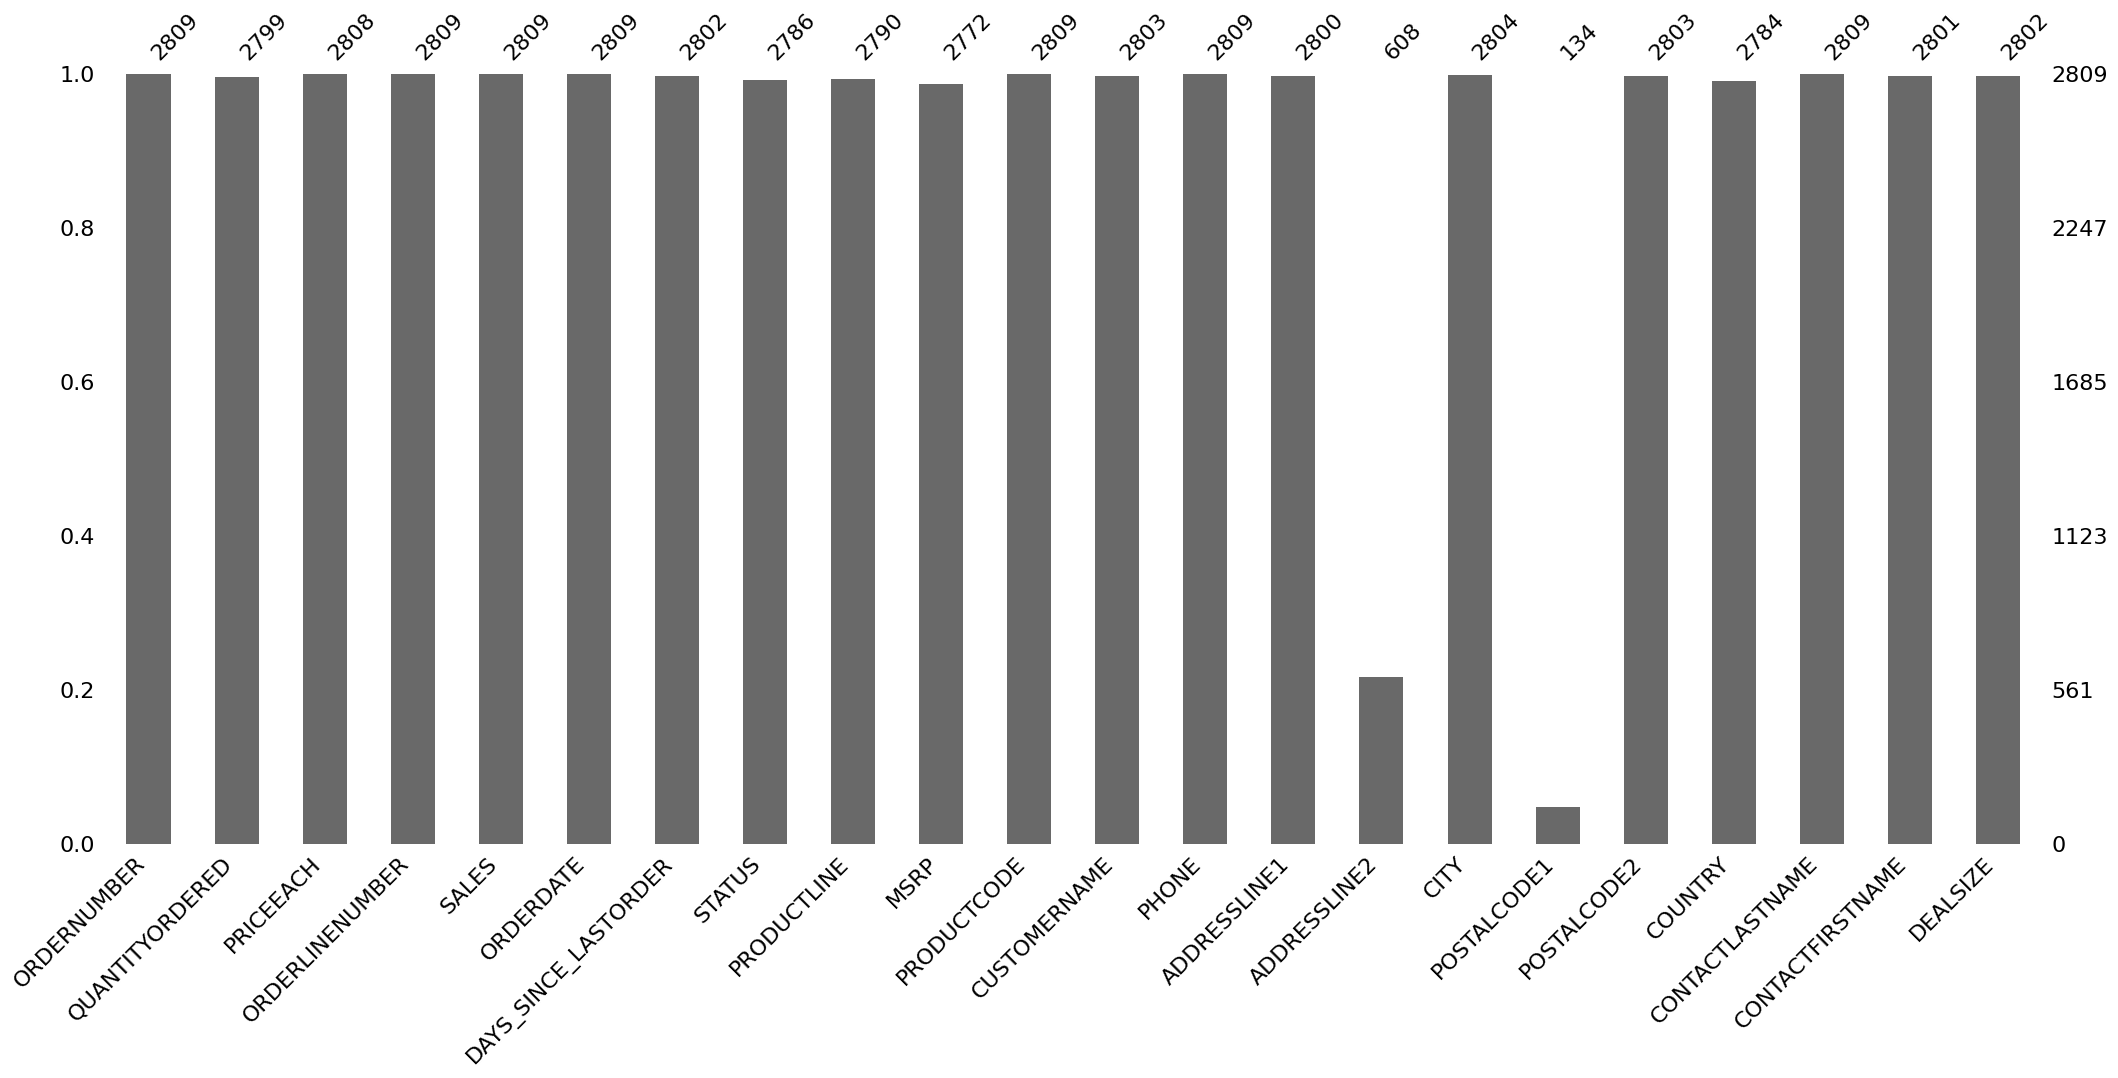

In [152]:
#see the completeness of the data using mano.bar
mano.bar(df)

<Axes: >

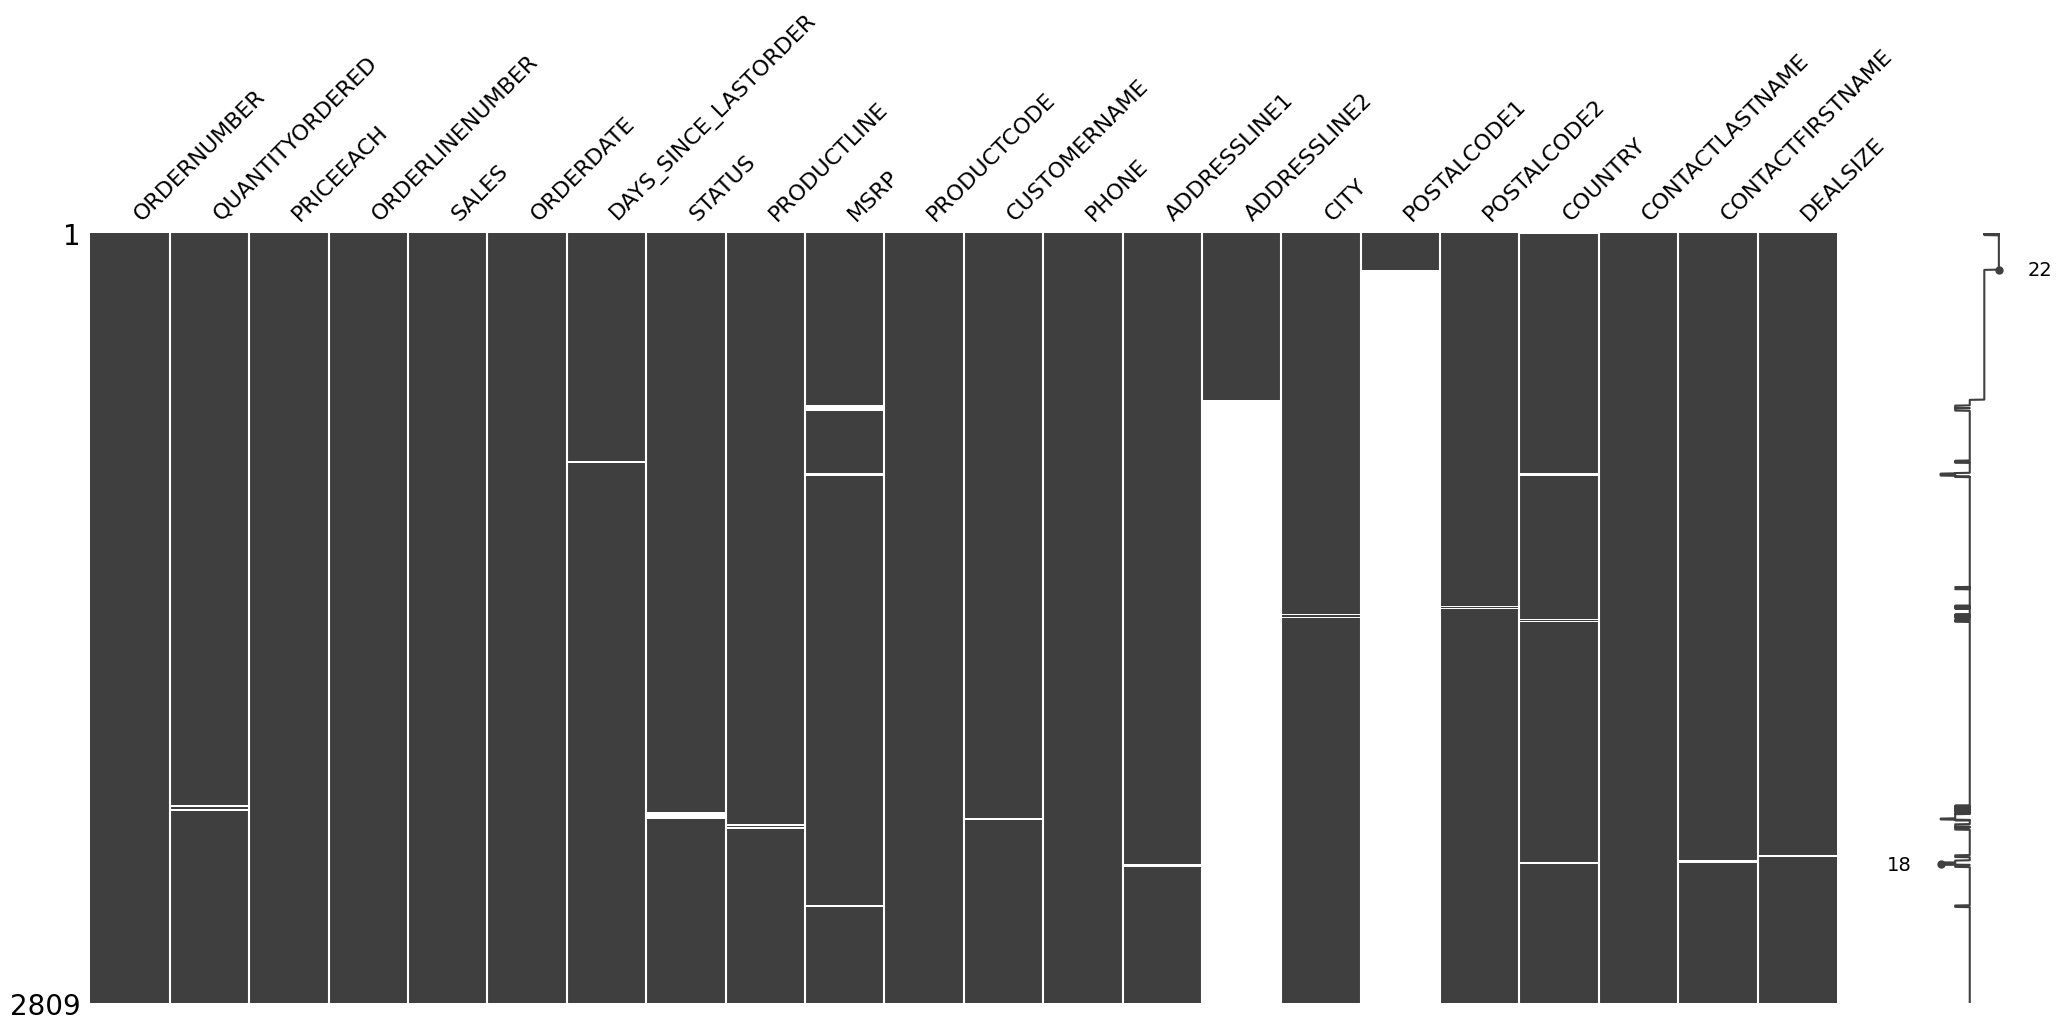

In [153]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(df)

The matrix above shows that this is an example of MCAR as there's no relation between the missing values of 2 or more variables.

<Axes: >

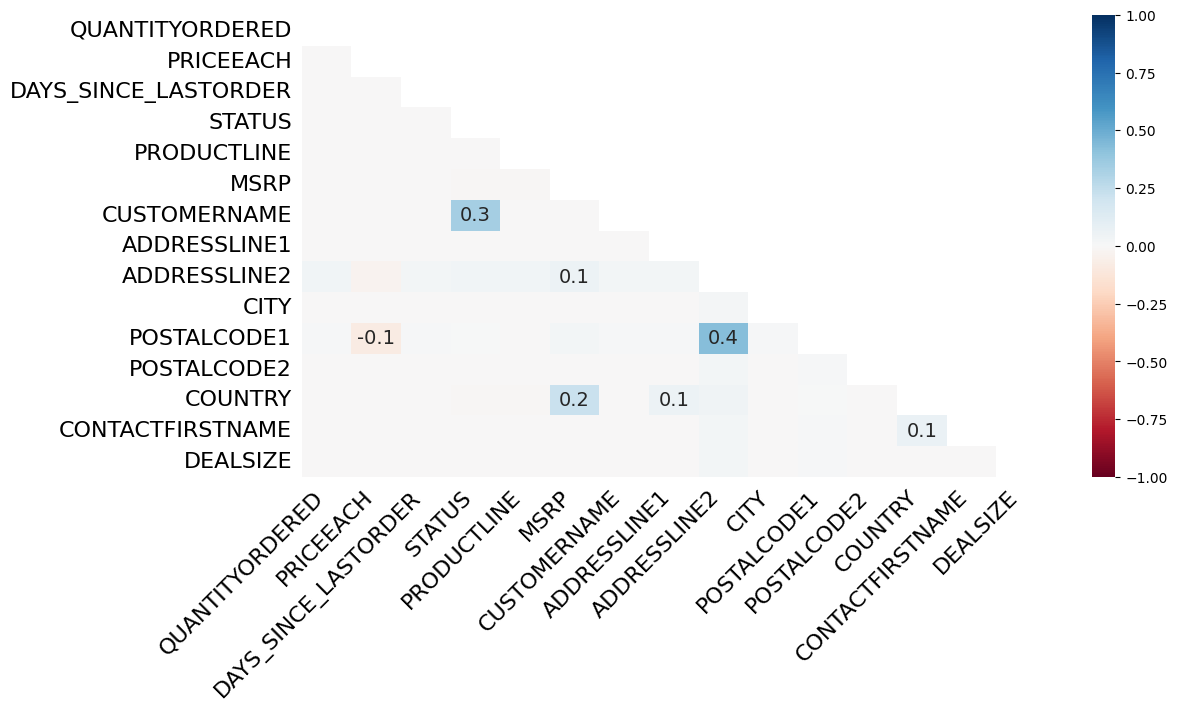

In [154]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(df, figsize=(12,6))

Low correlation further corroborates that this is an example of MCAR. However, PostalCode1 with AddressLine2 can be considered an example of MAR due to the relation.

<Axes: >

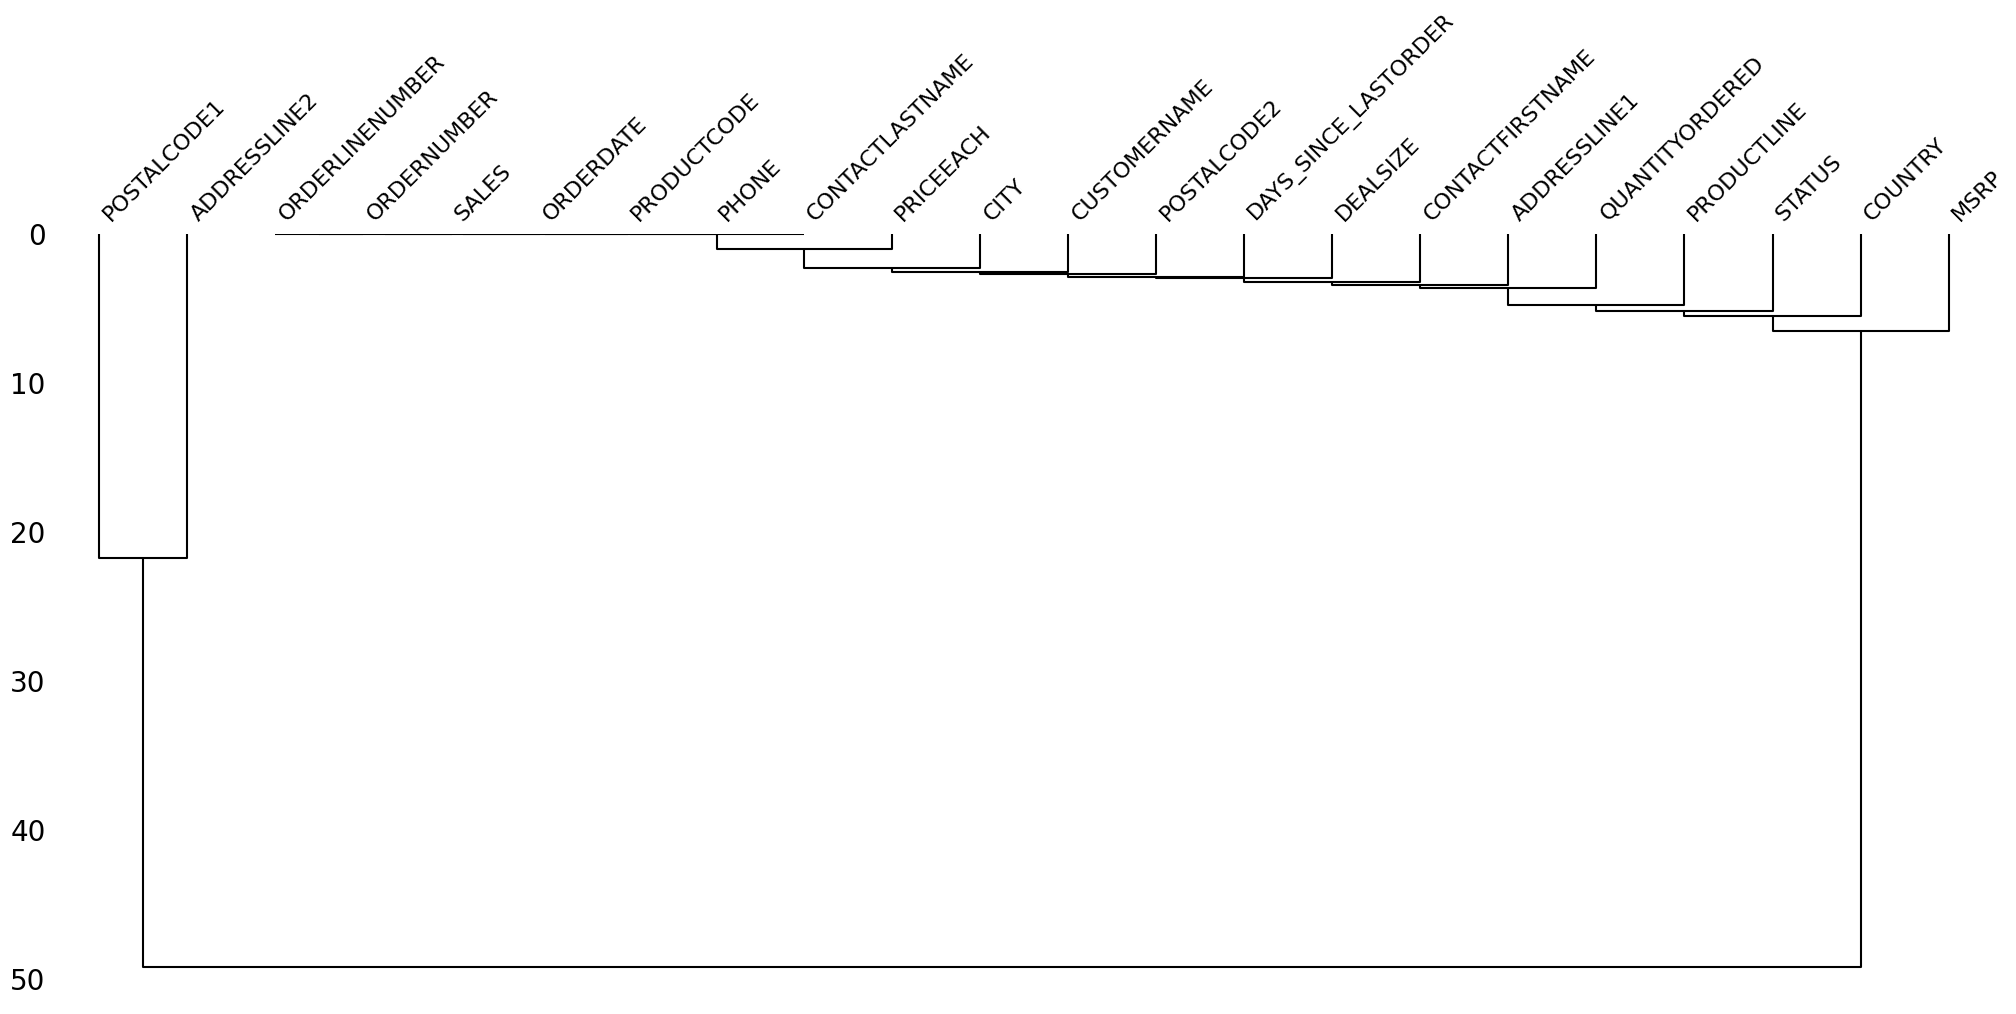

In [155]:
#dendogram will quantify and cluster the missingness
mano.dendrogram(df)

PostalCode1 and Addressline2 have a correlation so this further confirms MAR.
Close to 80% of the values are missing in these two columns so I've dropped them as they are insignificant for my analysis.

In [156]:
# dropping addressline2 and postalcode1
df = df.drop(['ADDRESSLINE2', 'POSTALCODE1'], axis=1)

In [157]:
#Dealing with missing values in the QUANTITYORDERED column.
#Logically we can divide SALES by PRICEEACH to get the QUANTITYORDERED.
df['QUANTITYORDERED'].fillna(df['SALES'] / df['PRICEEACH'], inplace=True)

In [158]:
#Dealing with missing values in the PRICEEACH column.
#Logically we can divide SALES by QUANTITYORDERED to get PRICEEACH.
df['PRICEEACH'].fillna(df['SALES'] / df['QUANTITYORDERED'], inplace=True)

In [159]:
#Dealing with missing values in the DAYS_SINCE_LASTORDER column.
from datetime import datetime

# Convert ORDERDATE to datetime if it's not already in datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
# Calculate the number of days since the last order by subtracting current date from ORDERDATE.
current_date = datetime.now()
df['DAYS_SINCE_LASTORDER'].fillna((current_date - df['ORDERDATE']).dt.days, inplace=True)


<ipython-input-159-aada52ef200d>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [160]:
#Dealing with missing vlaues in the STATUS column.
#Since there is no relation between the missing values and any of the observed attributes. We can create a separate category for missing values.
df['STATUS'].fillna('Unknown', inplace=True)

In [161]:
#Dealing with missing values in the PRODUCTLINE column.
#Since we have the PRODUCTCODE available for all the missing values of the PRODUCTLINE column.
# We can create a dictionary mapping PRODUCTCODE to PRODUCTLINE
productline_mapping = {
    'S10_1678': 'Motorcycles',
    'S32_2509': 'Trucks and Buses',
    # Add mappings for other product codes as needed
}

# Fill missing values in PRODUCTLINE column based on PRODUCTCODE
df['PRODUCTLINE'].fillna(df['PRODUCTCODE'].map(productline_mapping), inplace=True)

In [162]:
#Dealing with missing values in the MSRP column.
# We can again create a dictionary mapping PRODUCTCODE to MSRP
msrp_mapping = {
    'S18_2238': 163,
    'S18_2957': 62,
    'S700_1938': 86,
    # Add mappings for other product codes as needed
}

# Fill missing values in MSRP column based on PRODUCTCODE
df['MSRP'].fillna(df['PRODUCTCODE'].map(msrp_mapping), inplace=True)

In [163]:
#Lets again look at the missing values.
df.isnull().sum()

ORDERNUMBER              0
QUANTITYORDERED          0
PRICEEACH                0
ORDERLINENUMBER          0
SALES                    0
ORDERDATE                0
DAYS_SINCE_LASTORDER     0
STATUS                   0
PRODUCTLINE              0
MSRP                     0
PRODUCTCODE              0
CUSTOMERNAME             6
PHONE                    0
ADDRESSLINE1             9
CITY                     5
POSTALCODE2              6
COUNTRY                 25
CONTACTLASTNAME          0
CONTACTFIRSTNAME         8
DEALSIZE                 7
dtype: int64

In [164]:
#Dealing with missing values in the CUSTOMERNAME column.
# Count the number of times each distinct customer ordered
customer_order_counts = df['CUSTOMERNAME'].value_counts()
# Print the result
print(customer_order_counts)

Euro Shopping Channel           261
Mini Gifts Distributors Ltd.    182
Australian Collectors, Co.       59
La Rochelle Gifts                55
Land of Toys Inc.                52
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64


In [165]:
#Since Euro Shopping Channel is the most frequent customer. We can replace the missing values with the mode.
# Calculate the mode of the CUSTOMERNAME column
customername_mode = df['CUSTOMERNAME'].mode()[0]

# Replace missing values with the mode
df['CUSTOMERNAME'].fillna(customername_mode, inplace=True)

In [166]:
# Count the number of times each distinct customer ordered again to check
customer_order_counts = df['CUSTOMERNAME'].value_counts()
# Print the result
print(customer_order_counts)

Euro Shopping Channel           267
Mini Gifts Distributors Ltd.    182
Australian Collectors, Co.       59
La Rochelle Gifts                55
Land of Toys Inc.                52
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64


In [167]:
# Dealing with missing values in the city column.
# We use the information from existing rows where both the CUSTOMERNAME and CITY columns are populated to infer the missing city.
# Create a mapping of customer names to city values
customer_city_mapping = df.dropna(subset=['CITY']).set_index('CUSTOMERNAME')['CITY'].to_dict()

# Fill missing values in CITY column based on CUSTOMERNAME
df['CITY'] = df['CITY'].fillna(df['CUSTOMERNAME'].map(customer_city_mapping))


In [168]:
#For missing values in the country column, we can infer the cities to get the country name.
# Create a mapping of cities to countries
city_country_mapping = {
    'Reims': 'France',
    'NYC': 'USA',
    'Bergamo':'Italy',
    'Philadelphia':'USA',
    'Glen Waverly': 'Australia',
    'Burbank': 'USA',
    'Cambridge': 'UK',
    'Madrid':'Spain',
    'San Jose': 'USA',
    'San Rafael': 'USA',
    'Nantes': 'France',
    'NYC': 'USA',
    'Melbourne': 'Australia',
    'Paris': 'France',
    'White Plains': 'USA',
    'Cowes': 'UK',
    'Barcelona': 'Spain',
    'Glendale': 'USA',
    'Chatswood': 'Australia',
    'Nantes': 'France',
    'New Bedford': 'USA'

}

# Fill missing values in COUNTRY column based on CITY
df['COUNTRY'] = df.apply(lambda row: city_country_mapping.get(row['CITY'], row['COUNTRY']), axis=1)

Missing values in CONTACTFIRSTNAME column can be left untreated since first name and last name will be concatenated anyway.

In [169]:
#Missing values in the DEALSIZE column.
# We calculate the count of each category in the DEALSIZE column
dealsize_counts = df['DEALSIZE'].value_counts()

# Print the result
print(dealsize_counts)

Medium       1378
Small        1249
Large         166
Mediumer        3
Smaller         3
Smallerer       1
Smallrr         1
Largeer         1
Name: DEALSIZE, dtype: int64


 There is a clear dominant category (Medium) and I believe missing values are likely to belong to this category.

In [170]:
# Calculate the mode of the DEALSIZE column
dealsize_mode = df['DEALSIZE'].mode()[0]

# Replace missing values with the mode
df['DEALSIZE'].fillna(dealsize_mode, inplace=True)

In [171]:
# Replacing missing values in 'ADDRESSLINE1' and POSTALCODE2 column with 'N/A'
df['ADDRESSLINE1'].fillna('N/A', inplace=True)
df['POSTALCODE2'].fillna('N/A', inplace=True)

In [172]:
#Lets again look at the missing values.
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE2             0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        8
DEALSIZE                0
dtype: int64

### DATA INCONSISTENCIES AND DATA ENTRY ERRORS

In [173]:
#Starting with the DEALSIZE column, there are wrong entries such as Mediumer, Smaller, Smallrr.
# It should be just Large, Medium, and Small categories.
# Define a dictionary to map incorrect entries to correct categories
dealsize_mapping = {
    'Largeer': 'Large',
    'Mediumer': 'Medium',
    'Smaller': 'Small',
    'Smallerer': 'Small',
    'Smallrr': 'Small',
}

# Replace incorrect entries with correct categories
df['DEALSIZE'].replace(dealsize_mapping, inplace=True)

# Print the count of each category in the DEALSIZE column to verify
print(df['DEALSIZE'].value_counts())


Medium    1388
Small     1254
Large      167
Name: DEALSIZE, dtype: int64


In [174]:
#Moving into the COUNTRY column, some obvious data entry errors are misspelling of countries such as Spainland, USAP.
# Define a dictionary to map incorrect entries to correct country names
country_mapping = {
    'Spainland': 'Spain',
    'USAP': 'USA',
}

# Replace incorrect entries with correct country names
df['COUNTRY'].replace(country_mapping, inplace=True)

# Print the count of each category in the COUNTRY column to verify
print(df['COUNTRY'].value_counts())


USA            914
Spain          345
France         324
Australia      193
UK             185
Italy          114
Finland         93
Norway          89
Singapore       80
Canada          72
Denmark         63
Germany         62
Sweden          59
Austria         56
Japan           54
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64


Postal codes and addressline are not relevant to my analysis and the inconsistencies are too widespread to effectively address hence I have removed them from the data


In [175]:
#Checking for inconsistencies in the City column.
print(df['CITY'].value_counts())

Madrid        307
San Rafael    182
NYC           157
Singapore      80
Paris          73
             ... 
Brisbane       15
Sevilla        15
Burbank        14
Munich         14
Charleroi       8
Name: CITY, Length: 71, dtype: int64


From the list, the names of the city are correct and don't need to be fixed.

In [176]:
# To deal with PHONE number values. We can standardise the data to follow one format.
import re

# Define a function to clean phone numbers
def clean_phone_number(phone):
    # Remove special characters and keep only numerical values
    cleaned_phone = re.sub(r'\D', '', str(phone))
    return cleaned_phone

# Apply the clean_phone_number function to the PHONE column
df['PHONE'] = df['PHONE'].apply(clean_phone_number)

# Print the cleaned PHONE column
print(df['PHONE'])


0         2125557818
1           26471555
2        33146627555
3         6265557265
4         6505556809
            ...     
2804    810663425555
2805      0395204555
2806      2155559857
2807      2015559350
2808      2035552570
Name: PHONE, Length: 2809, dtype: object


In [177]:
# Saving the cleaned DataFrame
df.to_csv('CleanedAutoSales.csv', index=False)

### UNIVARIATE DESCRIPTIVE STATISICS

In [178]:
df['SALES'].describe()

count     2809.000000
mean      3587.928348
std       1867.638521
min        482.130000
25%       2218.520000
50%       3206.320000
75%       4528.860000
max      14082.800000
Name: SALES, dtype: float64

In [179]:
## Central Tendency (Mean)

#calculate the mean
print("Mean: ",df['SALES'].mean())

#convert to integer
print("Integerized Mean: ", int(df['SALES'].mean()))

#in the standard format
print("Standardized Mean: ","{:,}".format(int(df['SALES'].mean())))

Mean:  3587.9283481666075
Integerized Mean:  3587
Standardized Mean:  3,587


In [180]:
# Mean is a little high due to outliers
#Let's calculate the Median (central value)

print("Median: ", df['SALES'].median())

Median:  3206.32


In [181]:
#Mode for categorical variables
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [182]:
df['PRODUCTLINE'].mode()

0    Classic Cars
Name: PRODUCTLINE, dtype: object

BIVARIATE DESCRIPTIVE STATISICS

<Axes: xlabel='ORDERNUMBER', ylabel='SALES'>

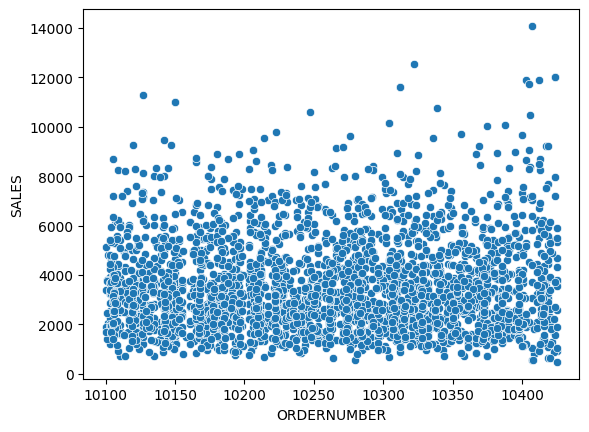

In [183]:
import seaborn as sns
sns.scatterplot(data=df, x="ORDERNUMBER", y="SALES")

<Axes: xlabel='SALES', ylabel='Count'>

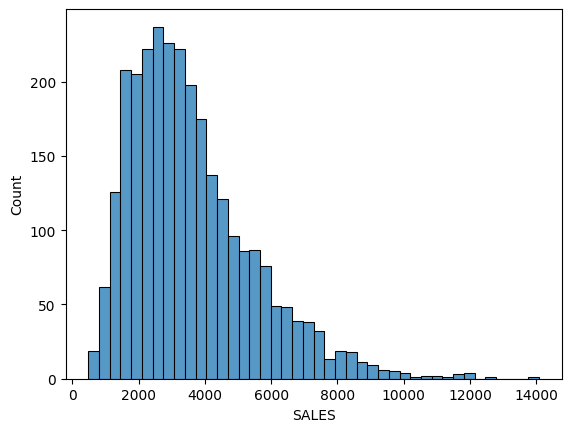

In [184]:
sns.histplot(df["SALES"])

We can see that the data is right-skewed (positive). This shows that there is an existence of a lot of outliers. Most of the sales were valued at $2000 to $4000. The distribution also has positive kurtosis (high)

<Axes: xlabel='SALES'>

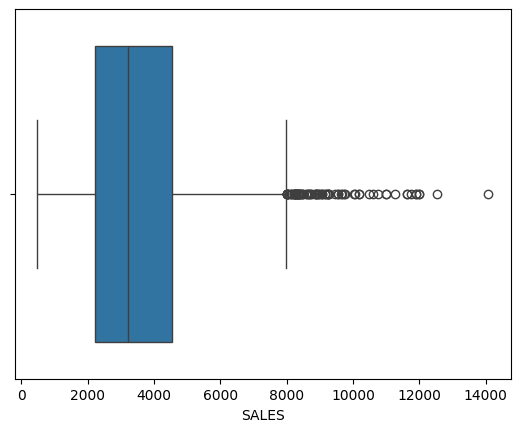

In [185]:
# x- axis boxplot
sns.boxplot(x=df['SALES'])

It can be inferred from the box plot that there are many values outside the whiskers (1.5x IQR) on the right showing presence of right skewness and outliers.

<ipython-input-186-d64c3b74c40e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALES'])


Skewness: 1.172571
Kurtosis: 1.832094


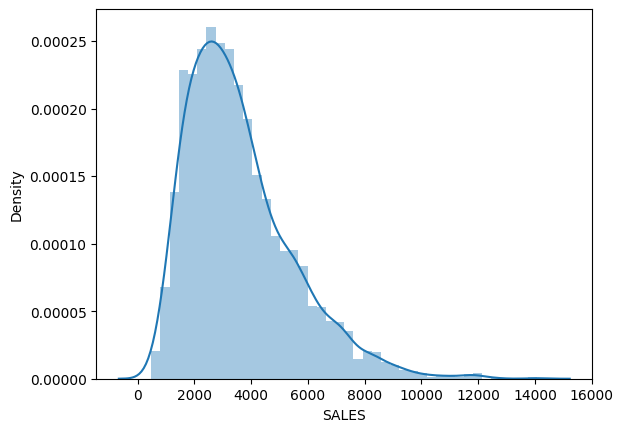

In [186]:
sns.distplot(df['SALES'])
print("Skewness: %f" % df['SALES'].skew())
print("Kurtosis: %f" % df['SALES'].kurt())

The distribution plot further corroborates the same hypothesis. Positive skew and high kurtosis with the existence of some outliers.

<Axes: xlabel='SALES', ylabel='QUANTITYORDERED'>

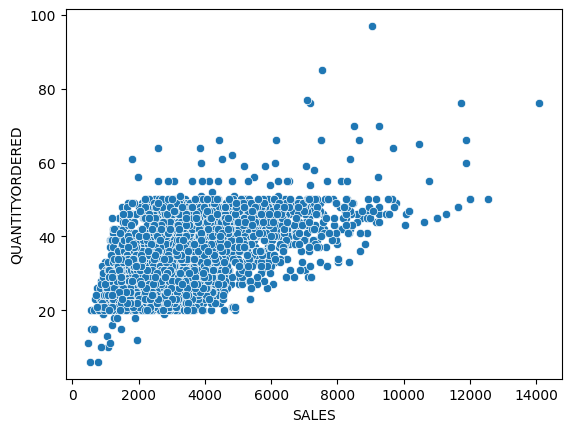

In [187]:
sns.scatterplot(data=df, x="SALES", y="QUANTITYORDERED")

<ipython-input-188-566b46ee264e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['QUANTITYORDERED'])


Skewness: 0.369020
Kurtosis: 0.439550


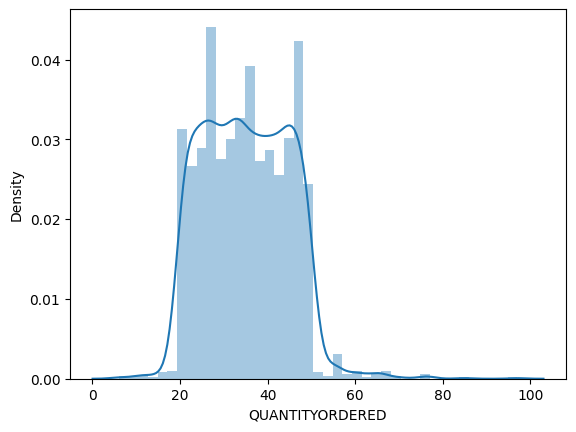

In [188]:
sns.distplot(df['QUANTITYORDERED'])
print("Skewness: %f" % df['QUANTITYORDERED'].skew())
print("Kurtosis: %f" % df['QUANTITYORDERED'].kurt())

It shows that the QUANTITYORDERED column doesn't have a central tendency. It is multimodal. We can infer that most customers ordered quantities between 20 and 50

<Axes: xlabel='QUANTITYORDERED'>

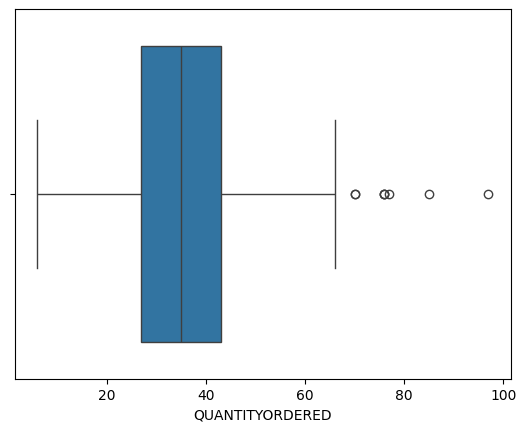

In [189]:
# x- axis boxplot
sns.boxplot(x=df['QUANTITYORDERED'])

We can see that their are 4 outliers in the QUANITYORDERED column.

<ipython-input-190-c317fa4d15d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)


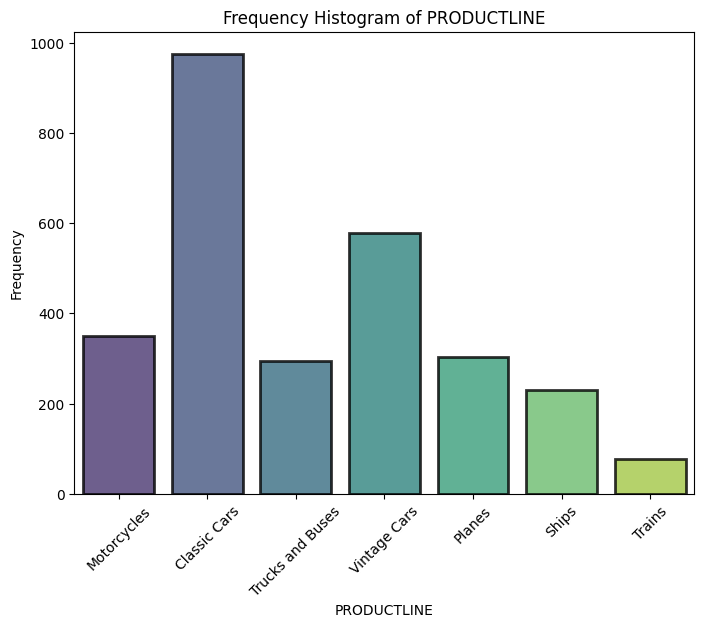

In [190]:
# Frequency histograms for categorical data
categorical_columns = ['PRODUCTLINE']
for column in categorical_columns:
    plot.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)
    plot.title(f'Frequency Histogram of {column}')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.xticks(rotation=45)
    plot.show()

Classic Car was the most popular productline.

<ipython-input-191-1476833ea0c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)


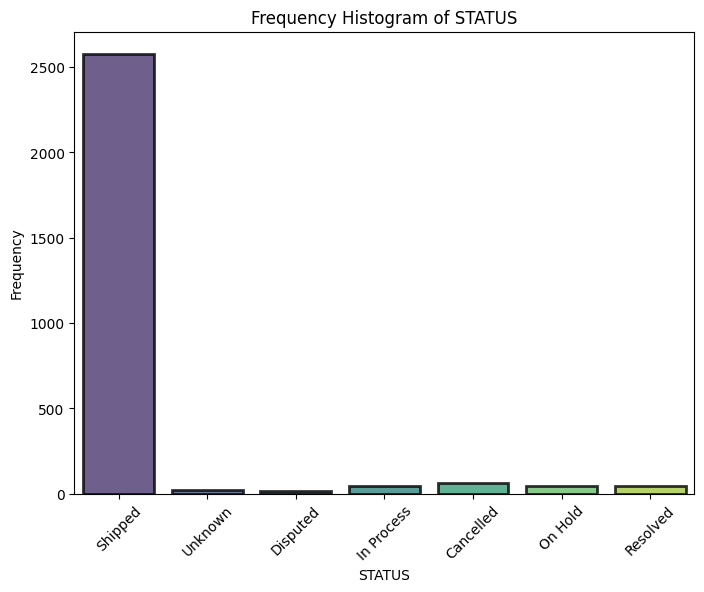

In [191]:
# Frequency histograms for categorical data
categorical_columns = ['STATUS']
for column in categorical_columns:
    plot.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)
    plot.title(f'Frequency Histogram of {column}')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.xticks(rotation=45)
    plot.show()

Most orders were shipped.

<ipython-input-192-7e6629a104b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)


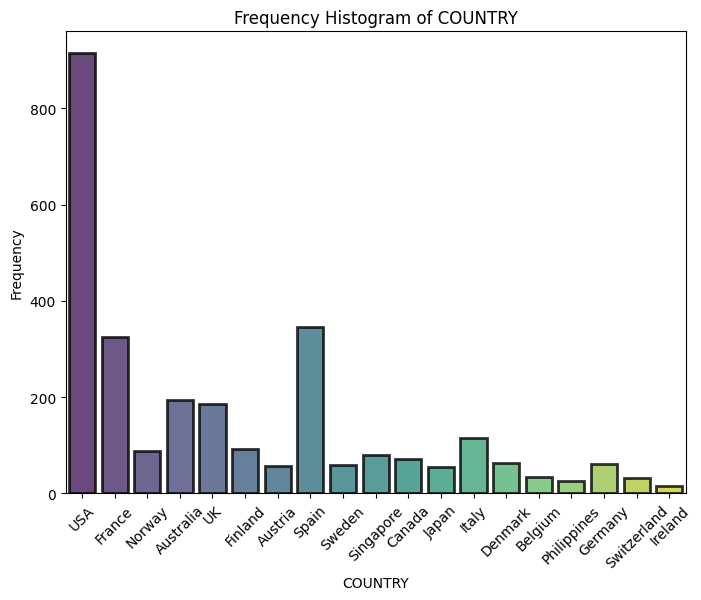

In [192]:
# Frequency histograms for categorical data
categorical_columns = ['COUNTRY']
for column in categorical_columns:
    plot.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='viridis', saturation=0.75, linewidth=2, edgecolor='black', alpha=0.8, dodge=False)
    plot.title(f'Frequency Histogram of {column}')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.xticks(rotation=45)
    plot.show()

We can see that most number of orders were made from USA followed by Spain and France.

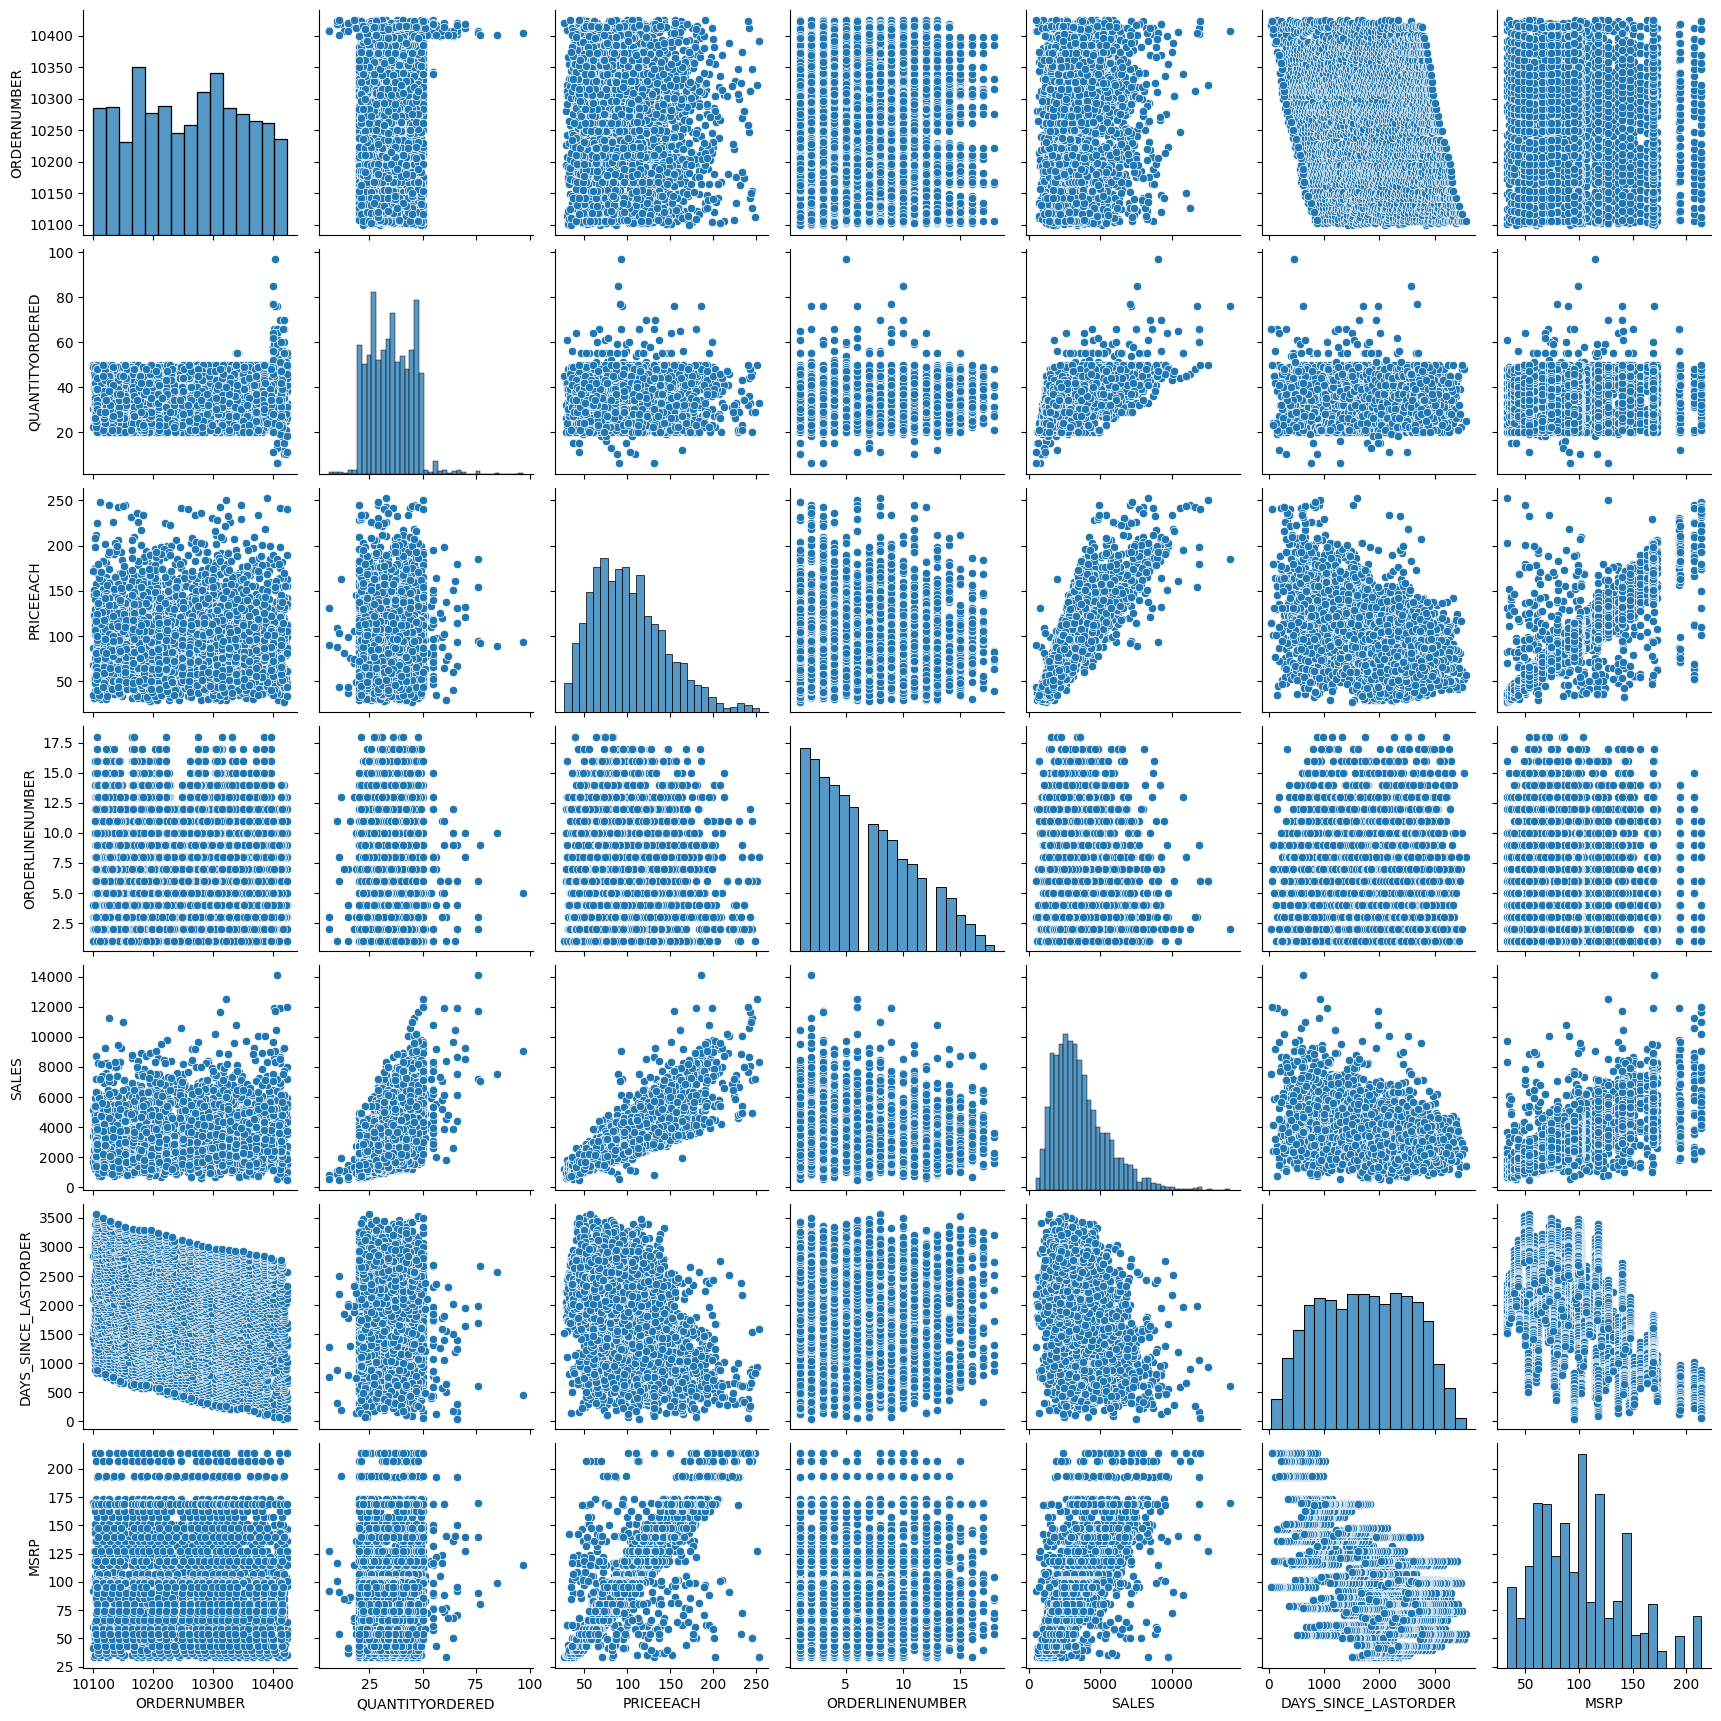

In [193]:
sns.pairplot(df)

### BIIVARIATE ANALYSIS

In [194]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Anova Test

In [195]:
model = ols('SALES ~ COUNTRY', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nAnova => SALES - COUNTRY")
display(anova_table)


Anova => SALES - COUNTRY


,sum_sq,df,F,PR(>F)
COUNTRY,4.319695e+07,18.0,0.686628,0.827704
Residual,9.751314e+09,2790.0,NaN,NaN


P Value is greater than 0.05. We will accept Null hypothesis as means arent different for both columns

In [196]:
model = ols('SALES ~ DEALSIZE', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nAnova => SALES - DEALSIZE")
display(anova_table)


Anova => SALES - DEALSIZE


,sum_sq,df,F,PR(>F)
DEALSIZE,7.545910e+09,2.0,4708.222431,0.0
Residual,2.248601e+09,2806.0,NaN,NaN


We will reject the null hypothesis as P-Value is less than 0.05. This indicates that there is a difference in means of these variables. We will conduct Tukey test

**Tukey Test**

In [197]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [198]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['SALES'],
                          groups=df['DEALSIZE'],
                          alpha=0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
 Large Medium -3915.7968   0.0 -4087.7292 -3743.8645   True
 Large  Small -6247.9915   0.0 -6420.9076 -6075.0754   True
Medium  Small -2332.1947   0.0 -2413.9787 -2250.4107   True
-----------------------------------------------------------


All three combinations have a P-Value of less than 0.05. We will be running comparisons on all of them

**Chi-Squared Test**

In [199]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# count of occurences of all combinations of the 2 columns
data_crosstab = pd.crosstab(df['PRODUCTLINE'], df['COUNTRY'],
margins = False)
print(data_crosstab)

COUNTRY           Australia  Austria  Belgium  Canada  Denmark  Finland  \
PRODUCTLINE                                                               
Classic Cars             57       25        4      16       34       38   
Motorcycles              30        6        0       1        0       14   
Planes                   25        6        1      10        2       12   
Ships                     2        4       11      14       14        9   
Trains                    1        0        3       0        4        2   
Trucks and Buses         20        5        0      16        2       11   
Vintage Cars             58       10       14      15        7        7   

COUNTRY           France  Germany  Ireland  Italy  Japan  Norway  Philippines  \
PRODUCTLINE                                                                     
Classic Cars         100       36        6     29      9      36           13   
Motorcycles           76        3        2      2     10      17            7   


In [200]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


dof=108
[[ 66.99003204  19.43752225  11.45425418  24.99110004  21.86721253
   32.28017088 112.45995016  21.52011392   5.55357779  39.56924172
   18.74332503  30.89177643   9.0245639   27.76788893 119.749021
   20.47881808  10.76005696  64.21324315 317.24813101]
 [ 23.97899608   6.95763617   4.1000356    8.94553222   7.82734069
   11.55464578  40.25489498   7.70309719   1.98789605  14.16375934
    6.70914916  11.05767177   3.23033108   9.93948024  42.86400854
    7.33036668   3.85154859  22.98504806 113.55856177]
 [ 20.88714845   6.06051976   3.57137771   7.79209683   6.81808473
   10.06479174  35.06443574   6.70986116   1.73157707  12.33748665
    5.84407262   9.63189747   2.81381274   8.65788537  37.33713065
    6.38519046   3.35493058  20.02135991  98.91634033]
 [ 15.80277679   4.58526166   2.70202919   5.89533642   5.15841937
    7.61480954  26.52901388   5.07653969   1.31007476   9.33428266
    4.42150231   7.28729085   2.12887148   6.5503738   28.24848701
    4.83090068   2.538269

P-Value is less than 0.05 so we will reject the null hypothesis. The variables are dependent on each other

**Correlation Heatmap**

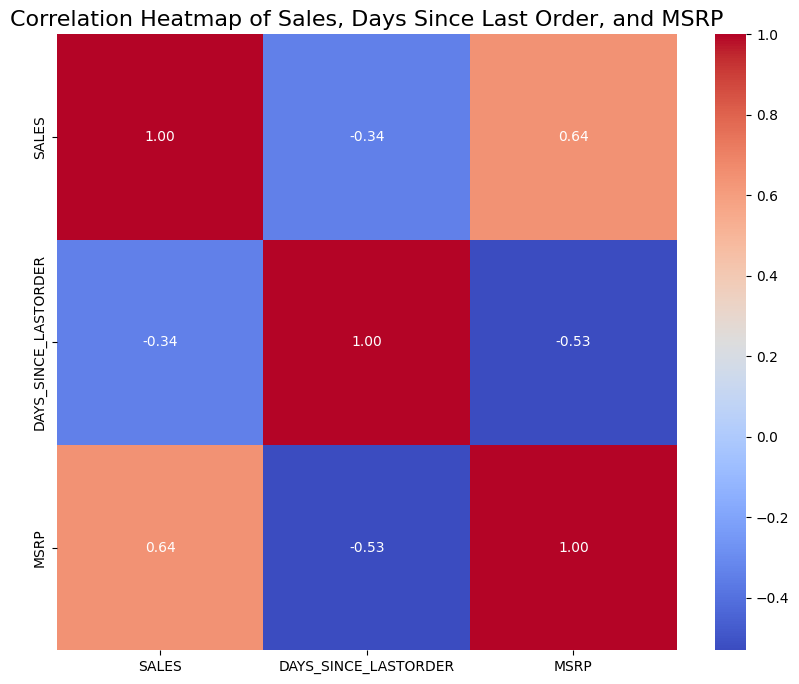

In [201]:
# Selecting the columns of interest
columns_of_interest = ['SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

# Calculating the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap of Sales, Days Since Last Order, and MSRP', fontsize=16)
plt.show()

A correlation coefficient of 0.64 between 'SALES' and 'MSRP' indicates a moderate positive correlation. This suggests that as the manufacturer's suggested retail price (MSRP) of the products increases, sales tend to increase as well, implying that higher-priced items may generate more revenue.

On the other hand, a correlation coefficient of -0.34 between 'SALES' and 'DAYS_SINCE_LASTORDER' indicates a weak negative correlation. This suggests that there is a slight tendency for sales to decrease as the number of days since the last order increases. However, the correlation is not strong, implying that there might be other factors influencing sales apart from the recency of orders.

### Normality Testing for SALES column.

Shapiro Wilk Test

In [202]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test on the SALES data
statistic, p_value = shapiro(df['SALES'])

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")


Shapiro-Wilk Test Statistic: 0.9246463775634766
P-value: 2.121571722326005e-35
The data does not follow a normal distribution (reject H0)


**K2 Test**

In [203]:
from scipy.stats import normaltest

# Perform normality test on the SALES data
k2stat, pvalue = normaltest(df['SALES'])

# Print the test statistic and p-value
print(f"K2stat: {k2stat}")
print(f"P-value: {pvalue}")

# Interpret the results
alpha = 0.05  # significance level
if pvalue > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")


K2stat: 542.2414357874545
P-value: 1.7937763307289993e-118
The data does not follow a normal distribution (reject H0)


From these results we can conclude that the SALES data is not normal and hence we cannot continue with biivariate Statisical testing where the variable is assumed to be normal. We can try to normalise the data though, but we haven't done that in class.

### Extra  - Machine Learning models

In [204]:
# Running a ML Linear Regressionm model withv Sales as the Indepenedent variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
selected_features = ['QUANTITYORDERED', 'PRICEEACH', 'PRODUCTLINE', 'DEALSIZE']  # Removed 'PRODUCTCODE'
X = df[selected_features].copy()
y = df['SALES']

# Encoding categorical features (if any)
label_encoder = LabelEncoder()
X['PRODUCTLINE'] = label_encoder.fit_transform(X['PRODUCTLINE'])
X['DEALSIZE'] = label_encoder.fit_transform(X['DEALSIZE'])

# Suppressing the DeprecationWarning
pd.options.mode.chained_assignment = None  # Suppress the warning

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions
y_pred = regression_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculating R-squared value
r_squared = regression_model.score(X_test, y_test)
print("R-squared value:", round(r_squared * 100, 2), "%")

Mean Squared Error: 159321.51622376466
R-squared value: 94.78 %


It shows that approximately 94.78% of the variability in the SALES is explained by the independent variables (quantity ordered, price each, product line, deal size).

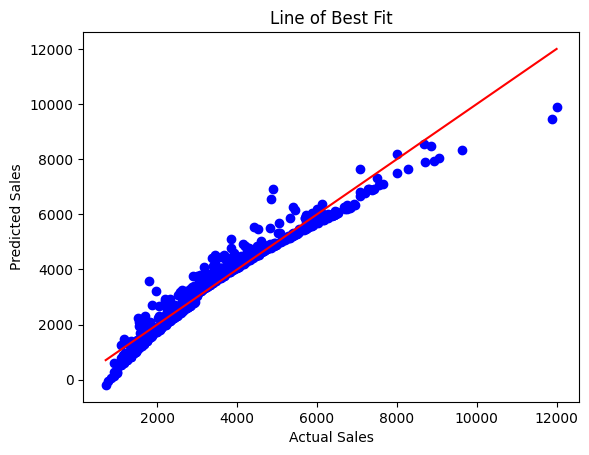

In [205]:
# Plotting the line of best fit against original values
plot.scatter(y_test, y_pred, color='blue')
plot.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of best fit
plot.xlabel('Actual Sales')
plot.ylabel('Predicted Sales')
plot.title('Line of Best Fit')
plot.show()